<h1>Crimes registados (N.º) pelas autoridades policiais</h1>

<a href="https://dados.gov.pt/pt/datasets/crimes-registados-n-o-pelas-autoridades-policiais/#_">https://dados.gov.pt/pt/datasets/crimes-registados-n-o-pelas-autoridades-policiais/#_</a>

<h2>Library</h2>

In [22]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt
import ssl

<h2>Main</h2>

In [23]:
# Disable SSL certificate verification to avoid error
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://dados.gov.pt/pt/datasets/r/bb01e010-0ed5-4a19-8da2-613bee384241"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())

In [35]:
#print(json.dumps(data, indent=4))

In [25]:
# Data available until 2022
for item in data:
    df = pd.json_normalize(item["Dados"]['2022'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geocod           5504 non-null   object
 1   geodsg           5504 non-null   object
 2   dim_3            5504 non-null   object
 3   dim_3_t          5504 non-null   object
 4   valor            4482 non-null   object
 5   sinal_conv       1022 non-null   object
 6   sinal_conv_desc  1022 non-null   object
dtypes: object(7)
memory usage: 301.1+ KB


In [26]:
# Remove NA with zero
df.fillna(0, inplace=True)

# Transform Valor into int
df['valor'] = df['valor'].astype(int)

# Revome Total from dataframe
df_filtered = df[~df['dim_3_t'].str.contains('Total')]

# Remove geo totals from dataframe
df_filtered = df_filtered[~df_filtered['geodsg'].str.contains('Região|Portugal|Continente|Norte|Centro|Área')]

In [37]:
df_filtered.head()

,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
0,16D0114,Oliveira do Bairro,28211_2840,Roubo por esticão e na via pública,3,0,0
1,16D0117,Sever do Vouga,28211_2840,Roubo por esticão e na via pública,4,0,0
2,16D0118,Vagos,28211_2840,Roubo por esticão e na via pública,3,0,0
3,16E0605,Figueira da Foz,28211_2840,Roubo por esticão e na via pública,19,0,0
4,16E0111,Mealhada,28211_2840,Roubo por esticão e na via pública,0,…,Dado confidencial


In [41]:
# Explore geodsg field
df_filtered['geodsg'].value_counts()

geodsg
Lagoa                 30
Algarve               30
Calheta               30
Oliveira do Bairro    15
Alto Minho            15
                      ..
Corvo                 15
Tavira                15
Penalva do Castelo    15
Aguiar da Beira       15
Sernancelhe           15
Name: count, Length: 325, dtype: int64

In [29]:
# Explore dim_3_t field
df_filtered['dim_3_t'].value_counts()

dim_3_t
Roubo por esticão e na via pública                                    328
Crimes contra o Estado                                                328
Crimes de homicídio voluntário consumado                              328
Crimes contra animais de companhia                                    328
Crimes contra a integridade física                                    328
Furto de veículo e em veículo motorizado                              328
Violência doméstica contra cônjuge ou análogos                        328
Condução sem habilitação legal                                        328
Crimes contra a vida em sociedade                                     328
Ofensa à integridade física voluntária simples                        328
Crimes contra a identidade cultural e integridade pessoal             328
Condução de veículo com taxa de álcool igual ou superior a 1,2 g/l    328
Crimes contra as pessoas                                              328
Crimes contra o património    

In [30]:
df_group_crime = df_filtered.groupby(['dim_3_t'])['valor'].sum().reset_index()

df_group_crime = df_group_crime.sort_values(by='valor', ascending=False)

<Axes: xlabel='dim_3_t'>

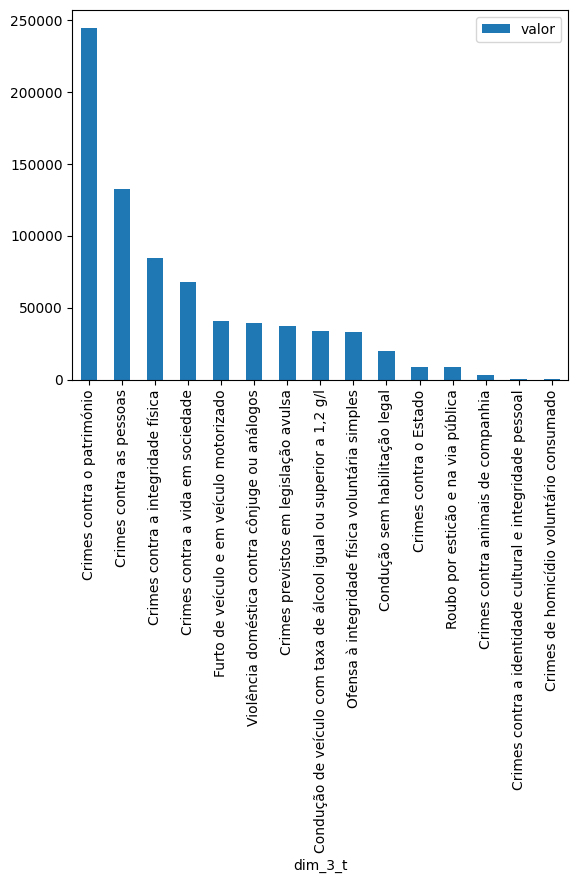

In [31]:
df_group_crime.plot(kind='bar',x='dim_3_t',y='valor')

In [32]:
df_group_geo = df_filtered[df_filtered['dim_3_t'] == 'Crimes contra o património'].groupby(['geodsg'])['valor'].sum().reset_index()
df_group_geo.sort_values(by=['valor'], ascending=False, inplace=True)
df_group_geo.head(10)

,geodsg,valor
15,Algarve,25580
133,Lisboa,18631
11,Alentejo,11325
219,Porto,8627
258,Sintra,6412
94,Cávado,5247
185,Oeste,5144
301,Vila Nova de Gaia,4413
132,Lezíria do Tejo,4261
19,Almada,3967


Text(0, 0.5, 'Valor')

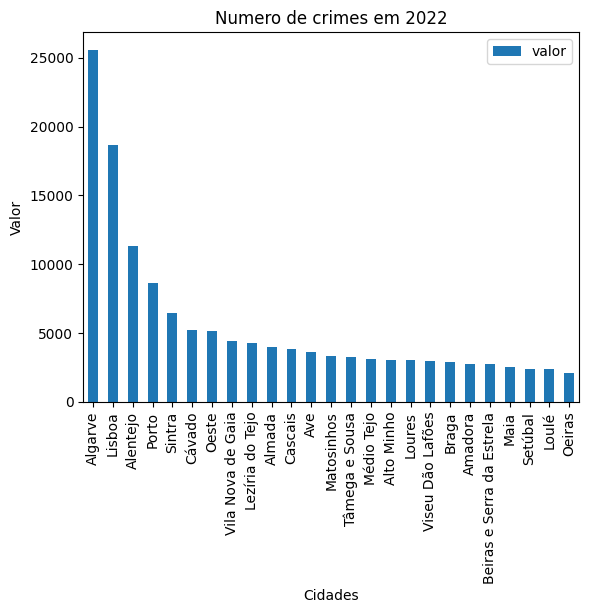

In [33]:
# Create bar plot with the top 25 Concelhos
df_group_geo.head(25).plot(kind='bar',x='geodsg',y='valor')
plt.title('Numero de crimes em 2022')
plt.xlabel('Cidades')
plt.ylabel('Valor')